# Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm, colors
import seaborn as sns
import plotly.express as px
sns.set()

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

import xgboost as xgb
import pickle

import warnings
warnings.filterwarnings('ignore')

# Load Dataset

In [2]:
df = pd.read_csv('datasets/Dataset_Machine_Learning.csv')
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)
df.head()

,Age,Attrition Status,Business Travel Frequency,Distance From Home (km),Education Level,Environment Satisfaction,Job Involvement,Job Level,Job Satisfaction,Monthly Income ($),Number of Companies Worked,Works Overtime,Salary Hike (%),Relationship Satisfaction,Stock Option Level,Total Working Years,Training Times Last Year,Work-Life Balance,Years at Company,Years in Current Role,Years Since Last Promotion,Years with Current Manager,Marital Status: Divorced,Marital Status: Married,Marital Status: Single,Gender: Female,Gender: Male
0,41,1,1,1,2,2,3,2,4,5993,8,1,11,1,0,8,0,1,6,4,0,5,False,False,True,True,False
1,49,0,2,8,1,3,2,2,2,5130,1,0,23,4,1,10,3,3,10,7,1,7,False,True,False,False,True
2,37,1,1,2,2,4,2,1,3,2090,6,1,15,2,0,7,3,3,0,0,0,0,False,False,True,False,True
3,33,0,2,3,4,4,3,1,3,2909,1,1,11,3,0,8,3,3,8,7,3,0,False,True,False,True,False
4,27,0,1,2,1,1,3,1,2,3468,9,0,12,4,1,6,3,3,2,2,2,2,False,True,False,False,True


# EDA

In [3]:
df.shape

(1470, 27)

In [4]:
df.columns

Index(['Age', 'Attrition Status', 'Business Travel Frequency',
       'Distance From Home (km)', 'Education Level',
       'Environment Satisfaction', 'Job Involvement', 'Job Level',
       'Job Satisfaction', 'Monthly Income ($)', 'Number of Companies Worked',
       'Works Overtime', 'Salary Hike (%)', 'Relationship Satisfaction',
       'Stock Option Level', 'Total Working Years', 'Training Times Last Year',
       'Work-Life Balance', 'Years at Company', 'Years in Current Role',
       'Years Since Last Promotion', 'Years with Current Manager',
       'Marital Status: Divorced', 'Marital Status: Married',
       'Marital Status: Single', 'Gender: Female', 'Gender: Male'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 27 columns):
 #   Column                      Non-Null Count  Dtype
---  ------                      --------------  -----
 0   Age                         1470 non-null   int64
 1   Attrition Status            1470 non-null   int64
 2   Business Travel Frequency   1470 non-null   int64
 3   Distance From Home (km)     1470 non-null   int64
 4   Education Level             1470 non-null   int64
 5   Environment Satisfaction    1470 non-null   int64
 6   Job Involvement             1470 non-null   int64
 7   Job Level                   1470 non-null   int64
 8   Job Satisfaction            1470 non-null   int64
 9   Monthly Income ($)          1470 non-null   int64
 10  Number of Companies Worked  1470 non-null   int64
 11  Works Overtime              1470 non-null   int64
 12  Salary Hike (%)             1470 non-null   int64
 13  Relationship Satisfaction   1470 non-null   int64
 14  Stock Op

In [6]:
df.describe()

,Age,Attrition Status,Business Travel Frequency,Distance From Home (km),Education Level,Environment Satisfaction,Job Involvement,Job Level,Job Satisfaction,Monthly Income ($),Number of Companies Worked,Works Overtime,Salary Hike (%),Relationship Satisfaction,Stock Option Level,Total Working Years,Training Times Last Year,Work-Life Balance,Years at Company,Years in Current Role,Years Since Last Promotion,Years with Current Manager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,0.161224,1.086395,9.192517,2.912925,2.721769,2.729932,2.063946,2.728571,6502.931293,2.693197,0.282993,15.209524,2.712245,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,0.367863,0.532170,8.106864,1.024165,1.093082,0.711561,1.106940,1.102846,4707.956783,2.498009,0.450606,3.659938,1.081209,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,0.000000,11.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,0.000000,1.000000,2.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2911.000000,1.000000,0.000000,12.000000,2.000000,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,0.000000,1.000000,7.000000,3.000000,3.000000,3.000000,2.000000,3.000000,4919.000000,2.000000,0.000000,14.000000,3.000000,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,0.000000,1.000000,14.000000,4.000000,4.000000,3.000000,3.000000,4.000000,8379.000000,4.000000,1.000000,18.000000,4.000000,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1.000000,2.000000,29.000000,5.000000,4.000000,4.000000,5.000000,4.000000,19999.000000,9.000000,1.000000,25.000000,4.000000,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [7]:
df.isna().sum()

Age                           0
Attrition Status              0
Business Travel Frequency     0
Distance From Home (km)       0
Education Level               0
Environment Satisfaction      0
Job Involvement               0
Job Level                     0
Job Satisfaction              0
Monthly Income ($)            0
Number of Companies Worked    0
Works Overtime                0
Salary Hike (%)               0
Relationship Satisfaction     0
Stock Option Level            0
Total Working Years           0
Training Times Last Year      0
Work-Life Balance             0
Years at Company              0
Years in Current Role         0
Years Since Last Promotion    0
Years with Current Manager    0
Marital Status: Divorced      0
Marital Status: Married       0
Marital Status: Single        0
Gender: Female                0
Gender: Male                  0
dtype: int64

In [8]:
df.duplicated().sum()

0

## Correlation

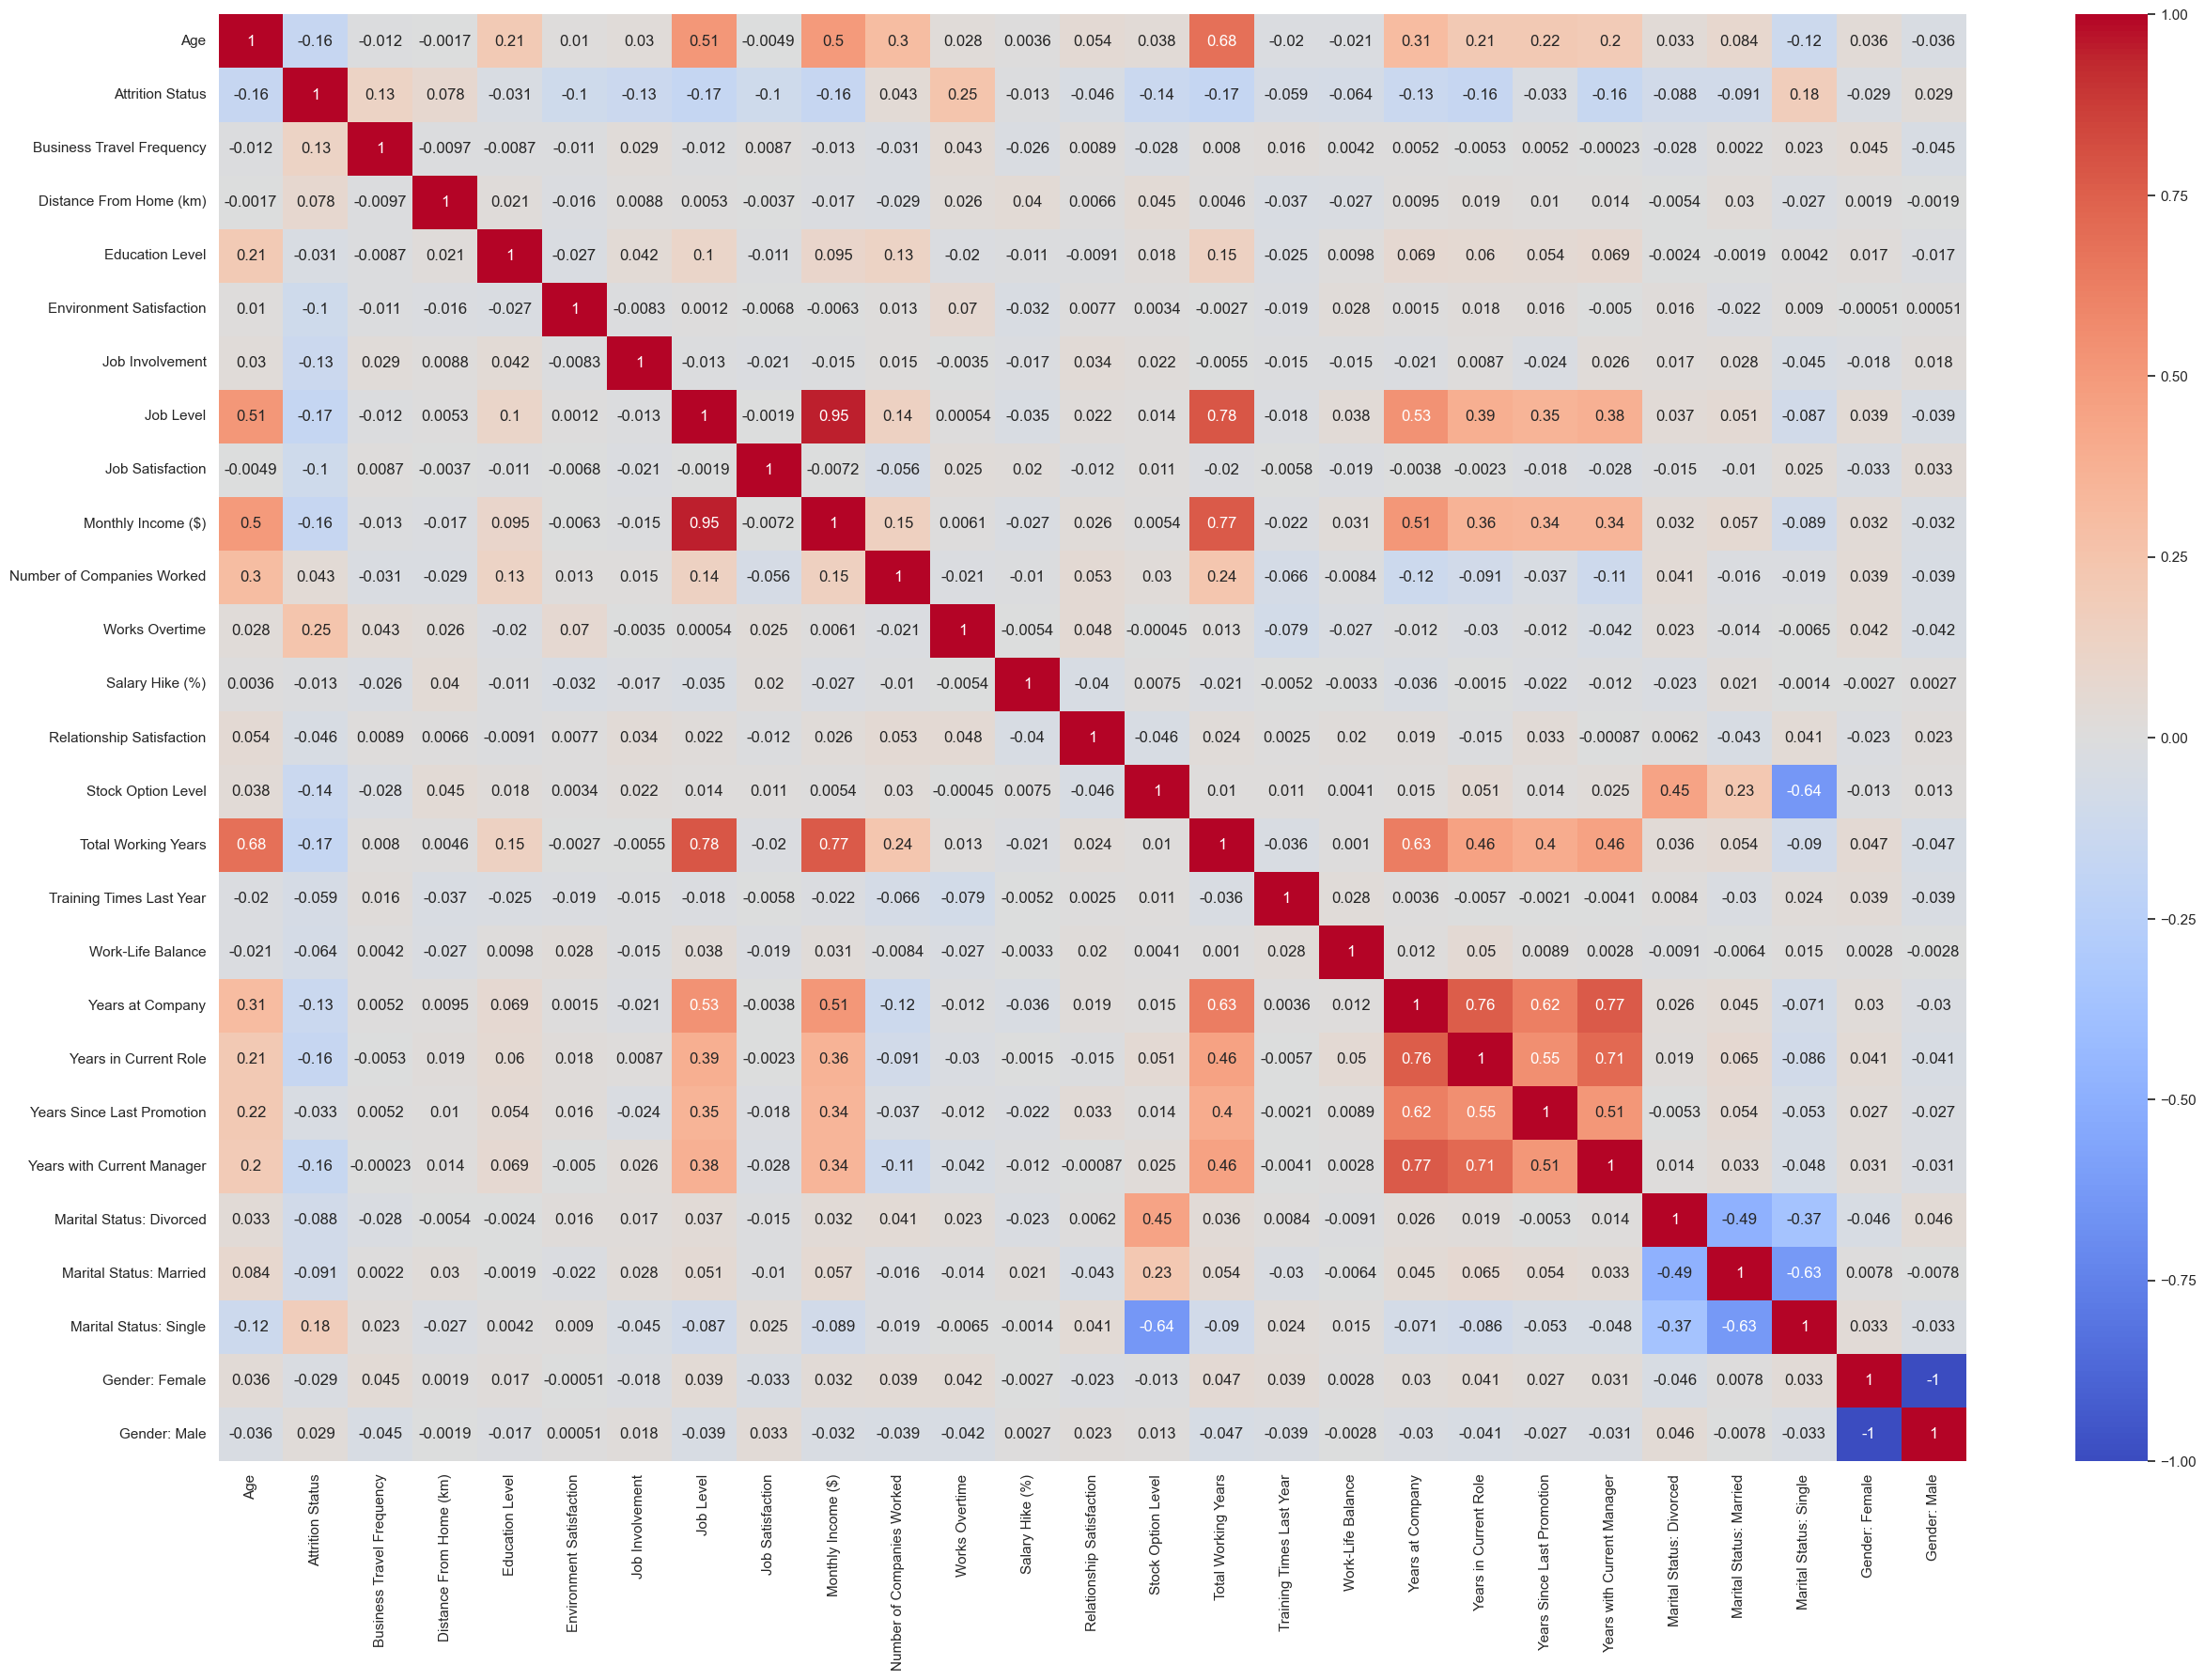

In [9]:
columns_corr = df.corr()
plt.figure(figsize=(30, 20))
sns.heatmap(columns_corr, annot=True, cmap='coolwarm')
plt.show()

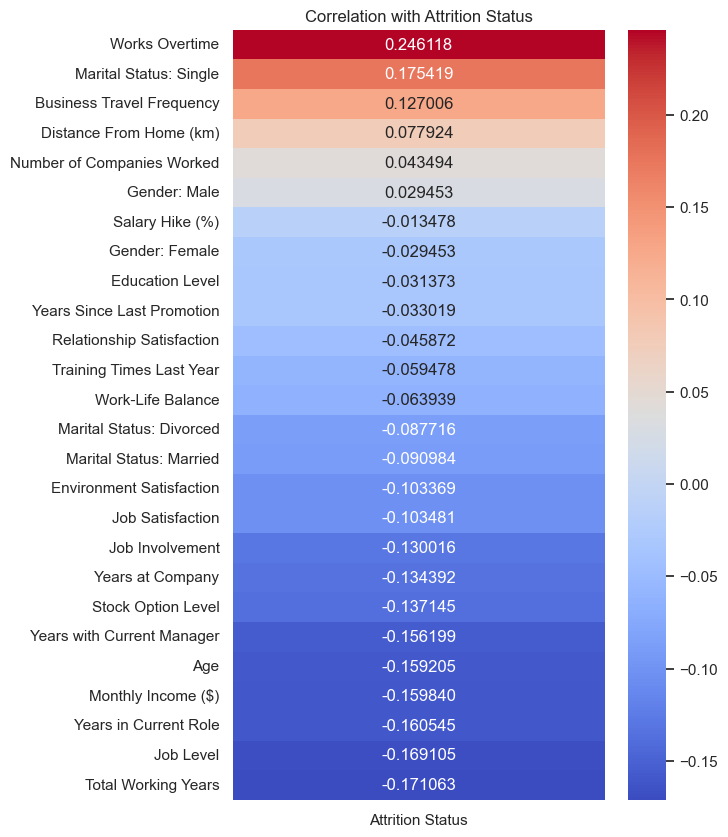

In [10]:
correlation_with_risk = df.corr()[["Attrition Status"]].sort_values(by="Attrition Status", ascending=False)
correlation_with_risk = correlation_with_risk.drop("Attrition Status")
plt.figure(figsize=(6, 10))
sns.heatmap(correlation_with_risk, annot=True, cmap='coolwarm', fmt=".6f")
plt.title("Correlation with Attrition Status")
plt.show()

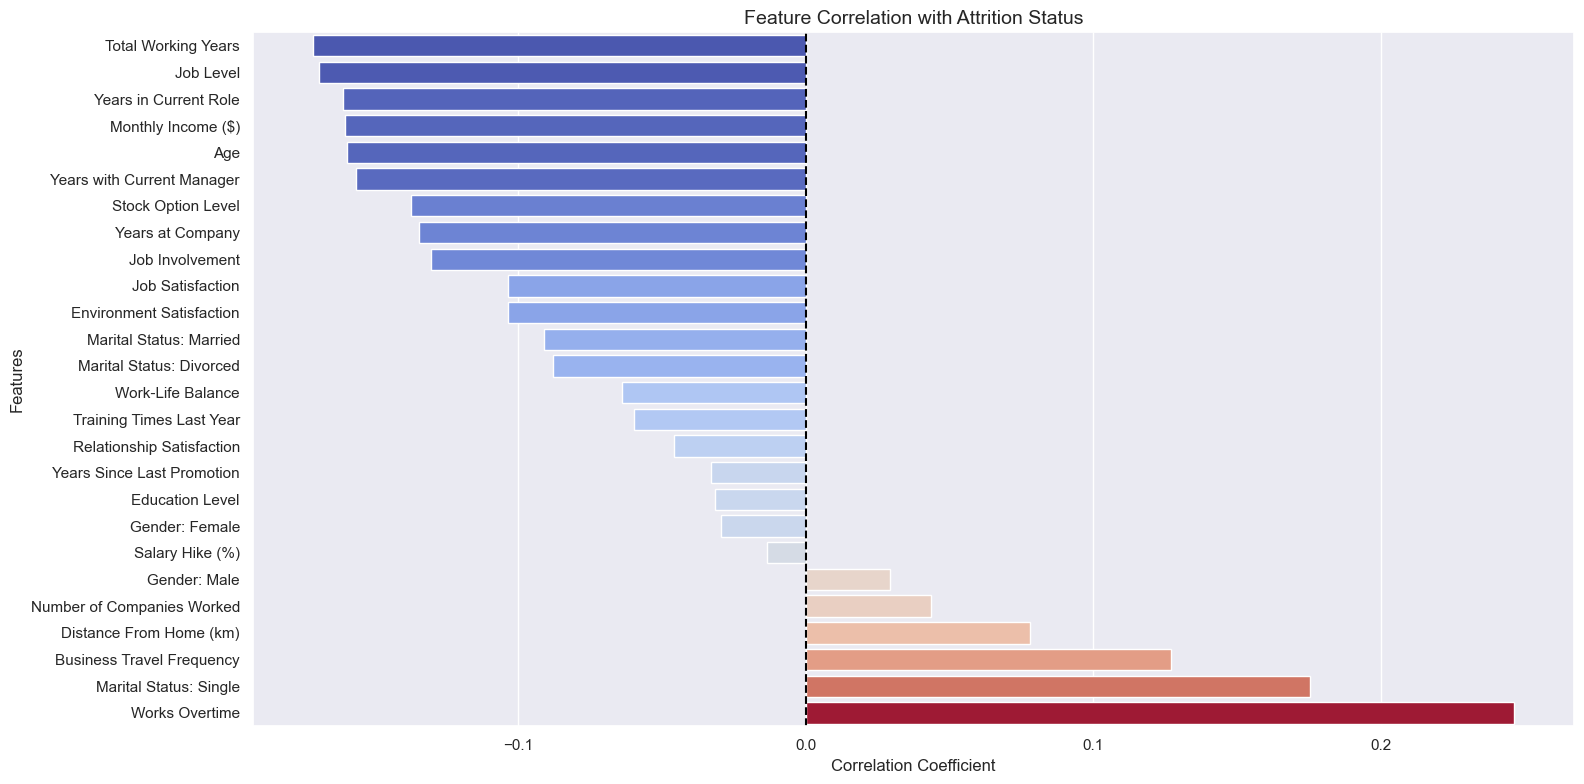

In [11]:
correlation_with_attrition = df.corr(numeric_only=True)["Attrition Status"].drop("Attrition Status").sort_values()
norm = colors.TwoSlopeNorm(vmin=correlation_with_attrition.min(),
                           vcenter=0,
                           vmax=correlation_with_attrition.max())

mapped_colors = [cm.coolwarm(norm(val)) for val in correlation_with_attrition.values]

plt.figure(figsize=(16, 8))
sns.barplot(
    x=correlation_with_attrition.values,
    y=correlation_with_attrition.index,
    palette=mapped_colors,
    orient='h'
)

plt.axvline(0, color='black', linestyle='--')
plt.title("Feature Correlation with Attrition Status", fontsize=14)
plt.xlabel("Correlation Coefficient")
plt.ylabel("Features")
plt.tight_layout()
plt.show()

## Split Dataset

In [12]:
X = df.drop('Attrition Status', axis=1)
y = df['Attrition Status']

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((1176, 26), (294, 26), (1176,), (294,))

## Feature Scaling

In [14]:
scaler = StandardScaler()
X_train_scaled, X_test_scaled = scaler.fit_transform(X_train), scaler.transform(X_test)

In [15]:
X_test_scaled_df = pd.DataFrame(X_test_scaled, columns=X.columns)

In [16]:
X_test_scaled_df.to_csv('datasets/Testing_Features.csv', index=False)
y_test.to_csv('datasets/Testing_Labels.csv', index=False)

In [17]:
with open('models/scaler.pkl', 'wb') as f:
    pickle.dump(scaler, f)

## Resampled Dataset

In [18]:
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train_scaled, y_train)

In [19]:
xgb_cls = xgb.XGBClassifier(random_state=42, eval_metric='logloss')
xgb_cls.fit(X_train_resampled, y_train_resampled)
y_pred = xgb_cls.predict(X_test_scaled)

In [20]:
print(f'Accuracy Score: {accuracy_score(y_test, y_pred)}')

Accuracy Score: 0.8401360544217688


In [21]:
print(f'Classification Report: \n{classification_report(y_test, y_pred)}')

Classification Report: 
              precision    recall  f1-score   support

           0       0.87      0.95      0.91       247
           1       0.50      0.26      0.34        47

    accuracy                           0.84       294
   macro avg       0.69      0.60      0.62       294
weighted avg       0.81      0.84      0.82       294



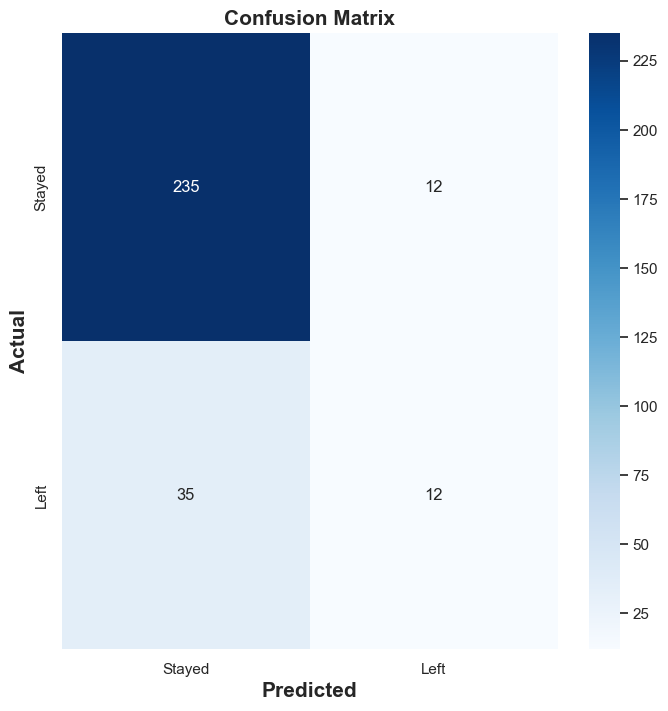

In [22]:
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Stayed', 'Left'], yticklabels=['Stayed', 'Left'])
plt.title(f'Confusion Matrix', fontsize=15, fontweight='bold')
plt.xlabel('Predicted', fontsize=15, fontweight='bold')
plt.ylabel('Actual', fontsize=15, fontweight='bold')
plt.show()

In [23]:
importances = xgb_cls.feature_importances_

importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
})

importance_df = importance_df.sort_values(by='Importance', ascending=False)
print(importance_df)

                       Feature  Importance
6                    Job Level    0.377335
10              Works Overtime    0.082109
13          Stock Option Level    0.080585
16           Work-Life Balance    0.047561
20  Years with Current Manager    0.047191
1    Business Travel Frequency    0.039908
7             Job Satisfaction    0.033077
4     Environment Satisfaction    0.030647
9   Number of Companies Worked    0.027478
5              Job Involvement    0.022602
3              Education Level    0.022165
0                          Age    0.021638
21    Marital Status: Divorced    0.018161
12   Relationship Satisfaction    0.017128
15    Training Times Last Year    0.015830
22     Marital Status: Married    0.014844
19  Years Since Last Promotion    0.014578
18       Years in Current Role    0.014189
8           Monthly Income ($)    0.013401
2      Distance From Home (km)    0.013308
24              Gender: Female    0.012324
14         Total Working Years    0.009753
17         

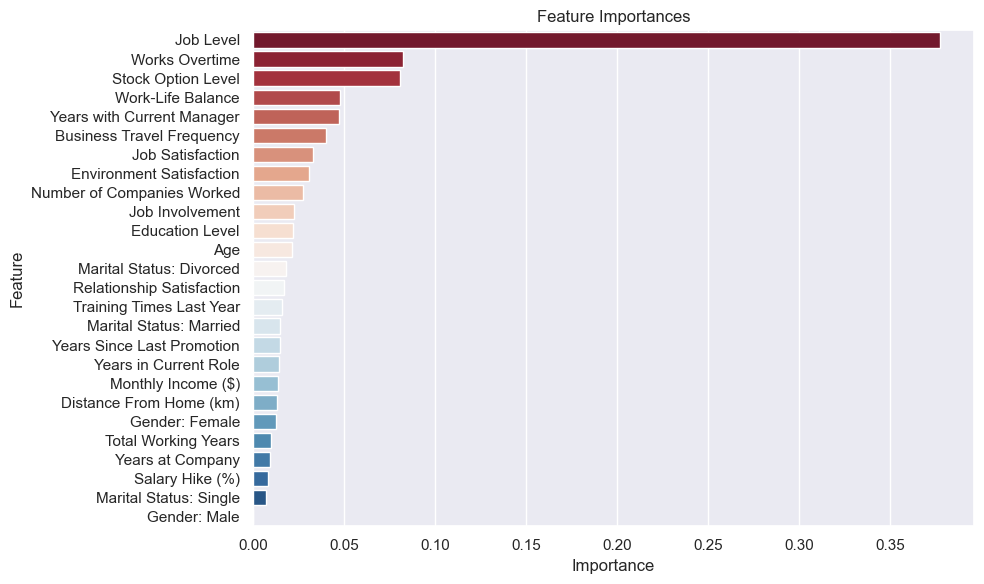

In [24]:
plt.figure(figsize=(10, 6))
sns.barplot(data=importance_df, x='Importance', y='Feature', palette='RdBu')
plt.title('Feature Importances')
plt.tight_layout()
plt.show()

In [25]:
with open('models/model.pkl', 'wb') as f:
    pickle.dump(xgb_cls, f)